# 📊 Fraud Detection EDA & Hypothesis Testing

In [15]:
# 🧹 1. Data Cleaning
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./data/Synthetic_Fraud_Dataset.csv")
df.dtypes
df.isnull().sum()

# Convert categorical columns
categorical_cols = ['fraud_type', 'process_stage', 'fraud_detected_at', 'is_preventable', 'channel', 'mfa_used', 'sim_swap_flag', 'user_error', 'region']
for col in categorical_cols:
    df[col] = df[col].astype('category')
df.head()

,fraud_type,process_stage,fraud_detected_at,is_preventable,channel,mfa_used,sim_swap_flag,user_error,loss_amount,risk_score,region
0,Identity Theft,OTP/Credentials,Processing,Yes,Online Banking,App-based,No,No,4031.69,0.34,Alberta
1,Identity Theft,OTP/Credentials,Initiation,Yes,ATM,Email OTP,Yes,No,4031.73,0.95,Quebec
2,Identity Theft,OTP/Credentials,Initiation,Yes,Online Banking,SMS OTP,No,No,1050.16,0.72,Quebec
3,Identity Theft,OTP/Credentials,Initiation,Yes,ATM,Email OTP,Yes,No,3375.42,0.56,Alberta
4,Identity Theft,OTP/Credentials,Processing,No,ATM,SMS OTP,No,Yes,3298.72,0.77,BC


In [16]:
# 📋 2. Data Summarization to Match Step-1
total_frauds = len(df)
print("Total fraud cases:", total_frauds)
df['fraud_type'].value_counts()

Total fraud cases: 36346


fraud_type
Identity Theft                  6552
Insider Theft                   5472
SMS Phishing                    5200
Email Phishing                  4500
Malware & Trojan                4364
Sensitive Information Theft     3268
Payment Redirection             2953
Weak Authentication Exploits    2947
Social Media Phishing           1090
Name: count, dtype: int64

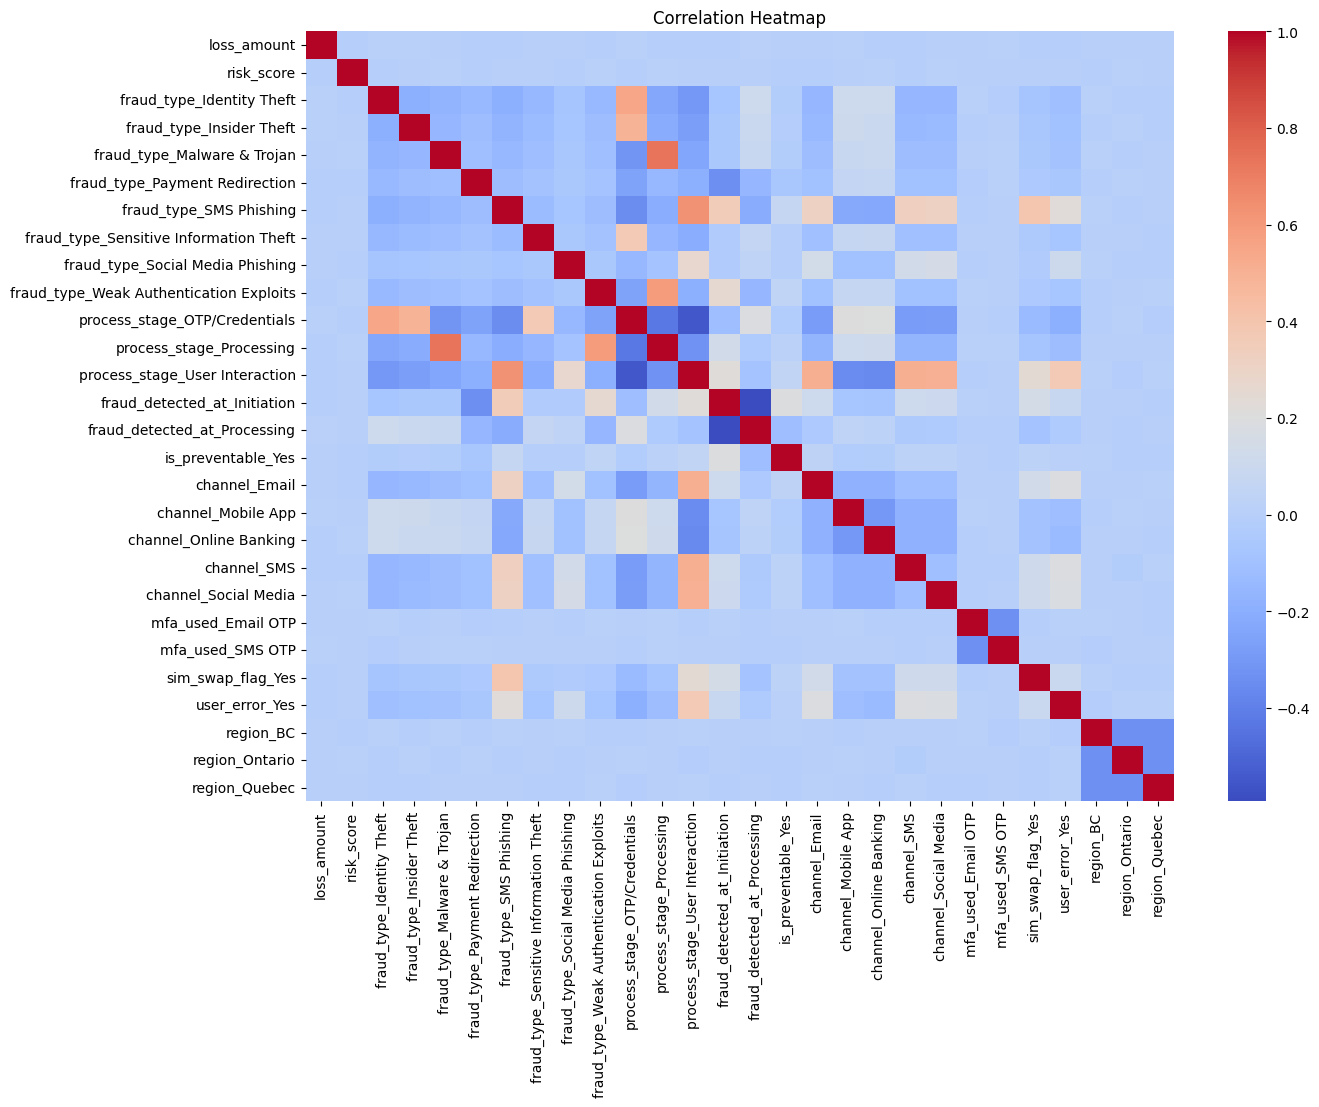

In [17]:
# 🔗 3. Correlation Analysis
df_encoded = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(14,10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

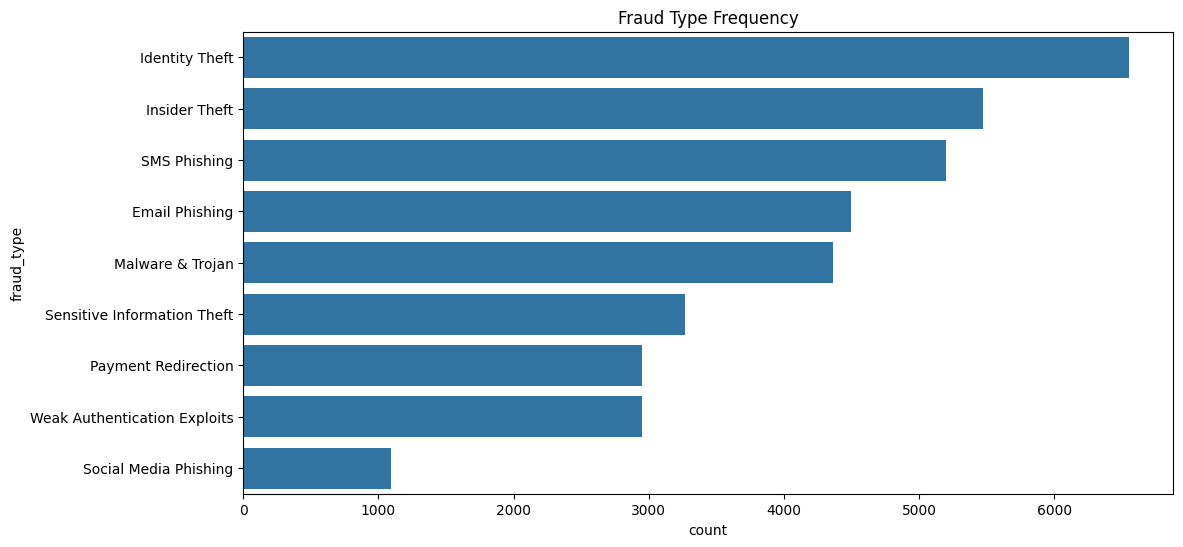

In [ ]:
# 📊 3. Fraud Type Distribution
plt.figure(figsize=(12,6))
sns.countplot(y='fraud_type', data=df, order=df['fraud_type'].value_counts().index)
plt.title("Fraud Type Frequency")
plt.show()

#### 📊 Fraud Type Frequency Chart

The bar chart above visually represents the distribution of fraud types in the dataset. As observed:

- **Identity Theft** is the most prevalent fraud type, accounting for 6,552 cases.
- **Insider Theft** and **SMS Phishing** also contribute significantly, with 5,472 and 5,200 cases respectively.
- The remaining fraud types such as **Email Phishing**, **Malware & Trojan**, and **Sensitive Information Theft** occur at a moderately high frequency.
- **Social Media Phishing** has the lowest occurrence, with 1,090 cases.

This visualization confirms that human-based exploits, especially phishing-related attacks, dominate the fraud landscape in Ontario and must be addressed with targeted AI interventions at the transaction initiation stage.


## Fraud Detection by Stage

C:\Users\Owner\AppData\Local\Temp\ipykernel_9352\1783033124.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stage_counts.index, y=stage_counts.values, palette='Blues_d')


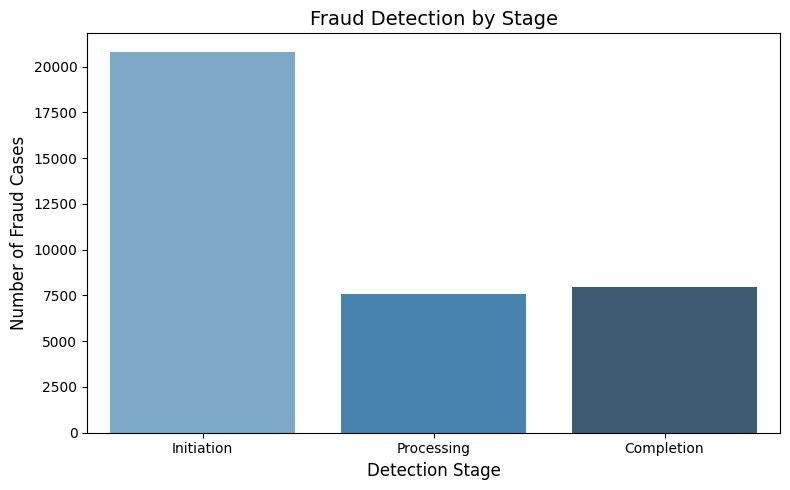

In [21]:
# 📊 Fraud Detection by Stage Chart (Image 1.7)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('./data/Synthetic_Fraud_Dataset.csv')

# Count of fraud detected at each stage
stage_counts = df['fraud_detected_at'].value_counts().reindex(['Initiation', 'Processing', 'Completion'])

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=stage_counts.index, y=stage_counts.values, palette='Blues_d')

# Labels and title
plt.title('Fraud Detection by Stage', fontsize=14)
plt.xlabel('Detection Stage', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.tight_layout()
plt.show()


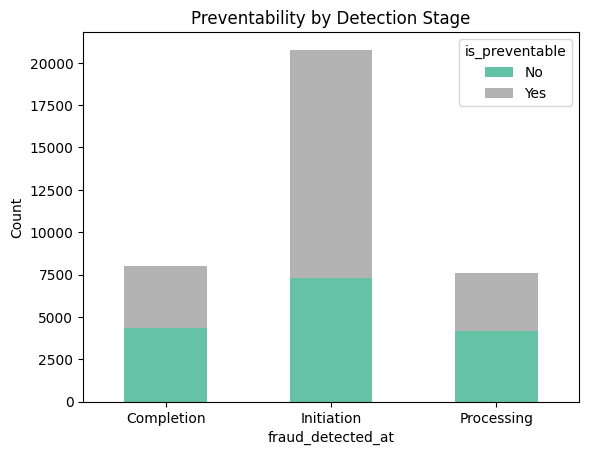

In [18]:
# 🔍 5. Detection Stage Analysis
stage_counts = pd.crosstab(df['fraud_detected_at'], df['is_preventable'])
stage_counts.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Preventability by Detection Stage")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

#### 🛡️ Preventability by Detection Stage

This stacked bar chart illustrates the relationship between detection stages and fraud preventability:

- **Initiation stage** exhibits the **highest number of preventable fraud cases**, with a significantly larger proportion of "Yes" compared to other stages.
- In contrast, **Completion** and **Processing** stages show a more balanced or lower preventability ratio, indicating delayed detection results in higher risk.
- This supports the hypothesis that **intercepting fraud at the initiation stage** can dramatically reduce its impact.

These findings strengthen the argument for implementing an **AI-powered Transaction Risk Engine** that focuses on real-time fraud detection at the point of transaction initiation.


### 🎯 Research Framework

To evaluate the effectiveness of early fraud detection using AI, we framed the following hypothesis based on the observed fraud landscape in Ontario.

#### ✅ Hypothesis

If financial institutions implement an **AI-powered Transaction Risk Engine** that targets fraud at the **transaction initiation stage**, the number of fraud cases in Ontario can be **reduced by up to 83.23%** *(36,346 cases)* through real-time interception and prevention mechanisms.

#### 🧪 Hypothesis Components

- **Independent Variable**:  
  Deployment of an AI-powered Transaction Risk Engine at the initiation stage.

- **Dependent Variable**:  
  Number of successfully executed fraud cases.

- **Population**:  
  Financial fraud cases reported across Ontario.

In [19]:
# ✅ 6. Chi-Square Test
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['fraud_detected_at'], df['is_preventable'])
chi2, p, dof, ex = chi2_contingency(contingency)
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p:.4e}")

if p < 0.05:
    print("Conclusion: Reject the null hypothesis – Fraud preventability is associated with detection stage.")
else:
    print("Conclusion: Fail to reject the null hypothesis – No association found.")

Chi-Square Statistic: 1377.68
Degrees of Freedom: 2
P-Value: 6.9168e-300
Conclusion: Reject the null hypothesis – Fraud preventability is associated with detection stage.


### 📊 Hypothesis Test Conclusion – Chi-Square Test

The Chi-Square test produced the following results:

- **Chi-Square Statistic**: 1377.68  
- **Degrees of Freedom**: 2  
- **P-Value**: 6.92 × 10⁻³⁰⁰  

#### ✅ Interpretation:
The p-value is significantly lower than any conventional significance threshold (e.g., 0.05), indicating **strong evidence against the null hypothesis**.

#### 🧾 Conclusion:
We **reject the null hypothesis**.  
This confirms that **fraud preventability is statistically associated with the stage at which fraud is detected**.

In particular, the **initiation stage shows the highest rate of preventable fraud**, supporting our hypothesis that deploying an AI-powered Transaction Risk Engine at this stage can significantly reduce the overall fraud volume.
